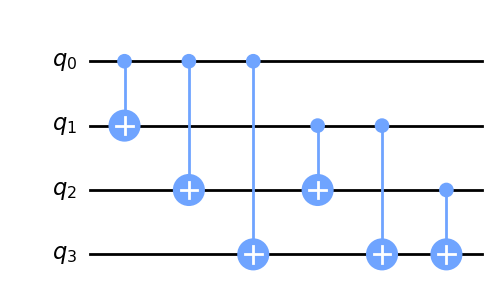

In [165]:
#Run each in order individually or unwanted results may appear
import numpy as np
from qiskit import *
from sympy import Matrix
from sympy.physics.quantum import TensorProduct
from qiskit import Aer
from qiskit.visualization import array_to_latex

#function for the quantum circuit changing the x in call will change the number of wires
def quantum_circuit(x):
    control=0
    entangled=0
    circ=QuantumCircuit(x)
    y=x-1
    for control in range(x):
        entangled=0
        entangled=control+1
        for n in range(y):
            circ.cx(control,entangled)
            entangled=entangled+1
        y=y-1
    backend=Aer.get_backend('unitary_simulator')
    job=backend.run(circ)
    result=job.result()
    unitary=result.get_unitary(circ)
    return circ, unitary
#change value in brackets for different number of wires    
circ,unitary=quantum_circuit(4)
circ.draw('mpl')

In [166]:
#change value of max to powers of 2 according to the number of wires 2^n
array_to_latex(unitary, max_size=16)

<IPython.core.display.Latex object>

In [159]:
from sympy import Matrix
from sympy.physics.quantum import TensorProduct
from sympy.physics.quantum.gate import CNOT
import math

#calculation of brakets

bra0 = Matrix([[1],[0]])
ket0 = Matrix([[1,0]])
bra1= Matrix([[0],[1]])
ket1= Matrix([[0,1]])

braket0=np.dot(bra0,ket0)
braket1=np.dot(bra1,ket1)

iden=np.identity(2)

Xgate=Matrix([[0,1],[1,0]])

#kroenke products of the identity of xgates according to algorithm method
identity=np.kron(iden,iden)
ident2=np.kron(identity,iden)

xgates=np.kron(Xgate,Xgate)
xgates2=np.kron(xgates,Xgate)
xident=np.kron(Xgate,iden)

s2temp=np.kron(identity,braket0)
s22t=np.kron(xgates,braket1)

s3temp=np.kron(iden,braket0)
s3xtemp=np.kron(Xgate,braket1)

#Calculation of the states and multiplication of them in order

State1=np.kron(ident2,braket0)+np.kron(xgates2,braket1)
State2=np.kron(s2temp,iden)+np.kron(s22t,iden)
State3=np.kron(s3temp,identity)+np.kron(s3xtemp,identity)
Statetemp=np.matmul(State3,State2)
State=np.matmul(Statetemp,State1)
State

array([[1.00000000000000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.00000000000000],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.00000000000000, 0],
       [0, 1.00000000000000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.00000000000000, 0, 0, 0],
       [0, 0, 0, 1.00000000000000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1.00000000000000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.00000000000000, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1.00000000000000, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1.00000000000000, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1.00000000000000, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1.00000000000000, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1.00000000000000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.00000000000000, 0, 0,

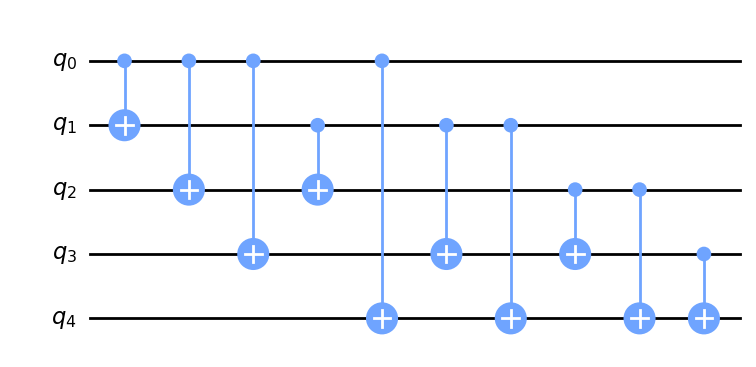

In [161]:
#circuit call for 5 wires
circ,unitary=quantum_circuit(5)
circ.draw('mpl')

In [162]:
#in built function call for a matrix of 5 wires
array_to_latex(unitary, max_size=32)

<IPython.core.display.Latex object>

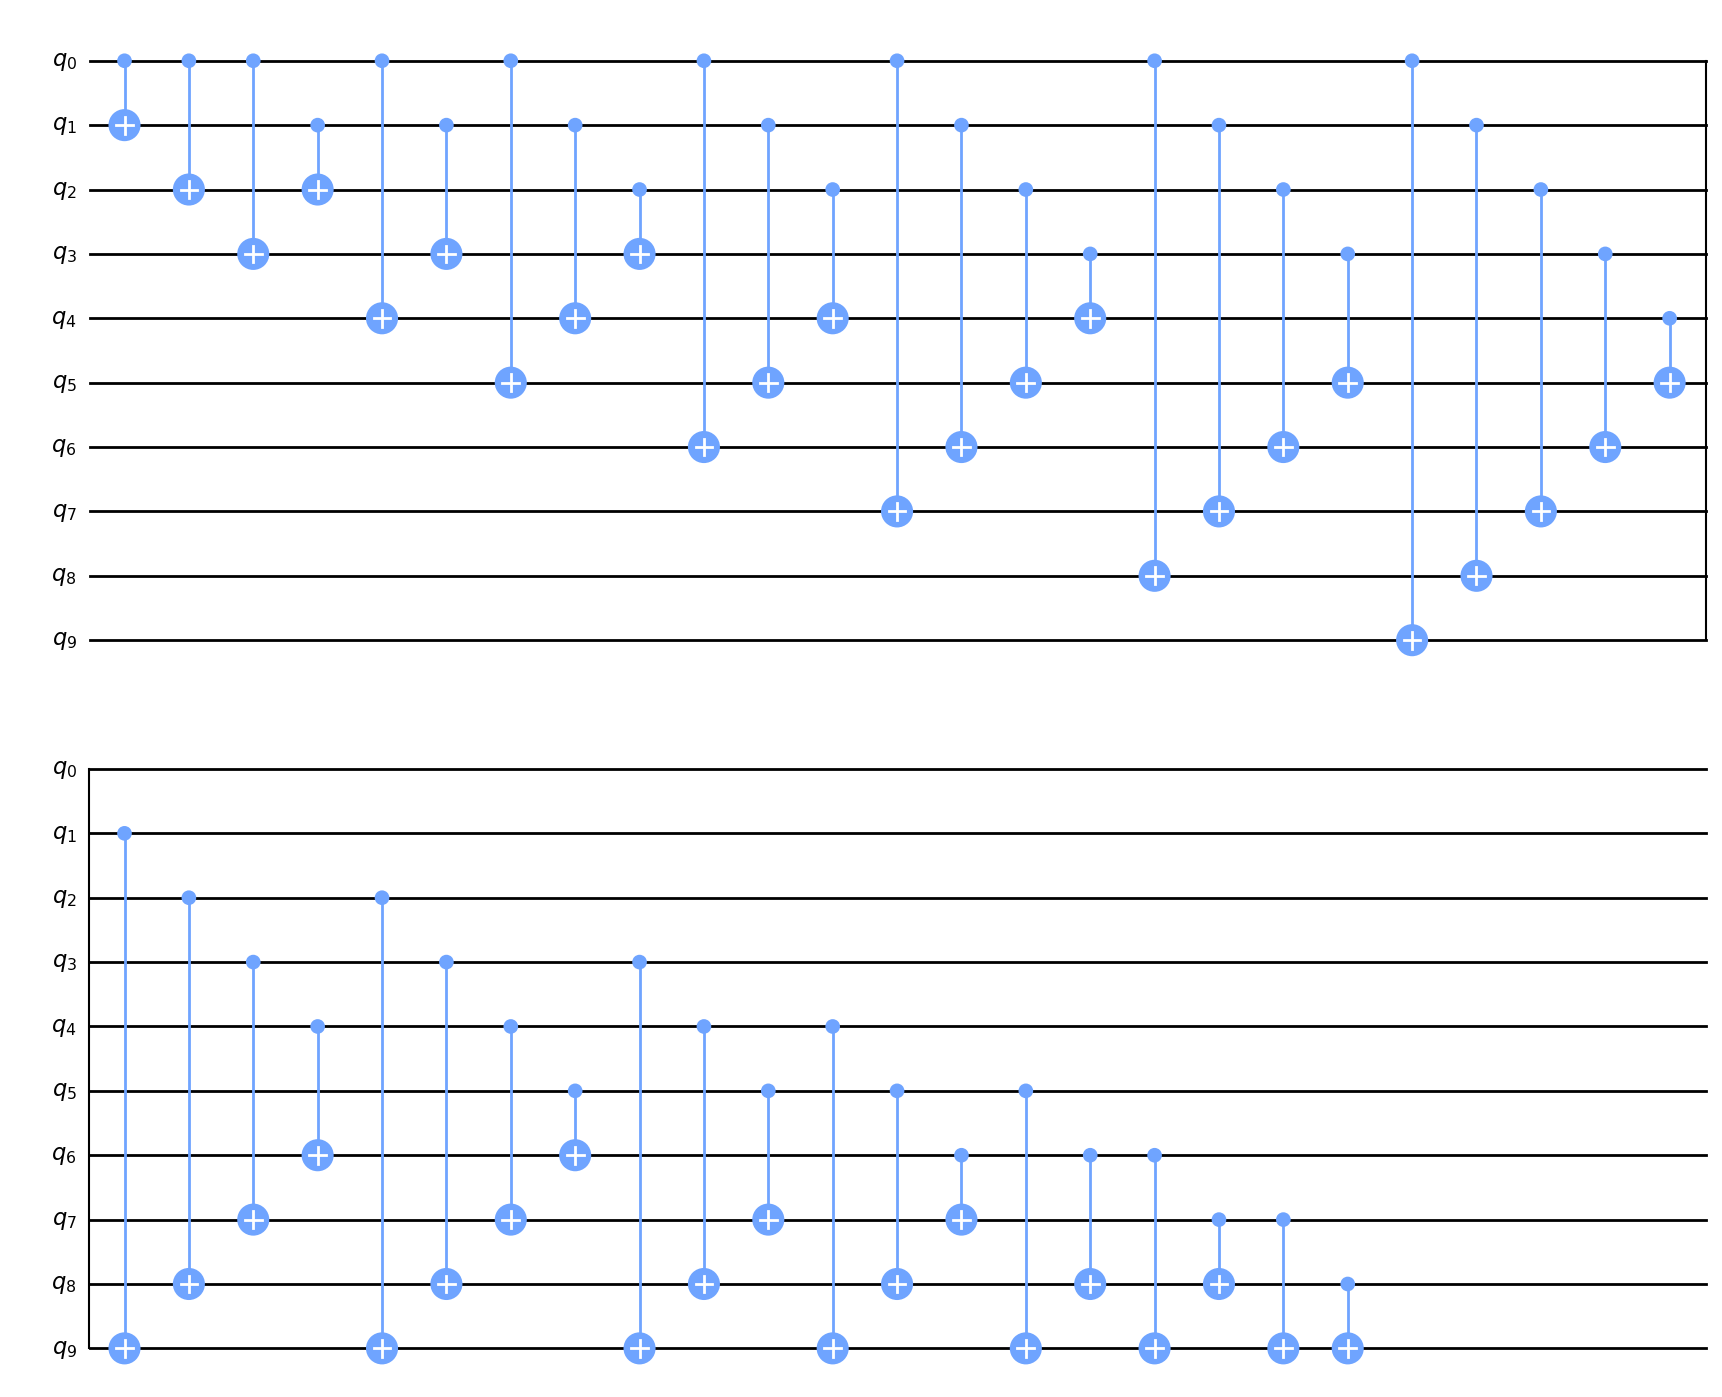

In [163]:
#circuit call for 10 wires
circ,unitary=quantum_circuit(10)
circ.draw('mpl')

In [ ]:
#in built function call for matrix of 10 wires, uncomment at your own peral as it takes forever to run and hence is commented
#array_to_latex(unitary, max_size=1024)